In [41]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
from pandas import DataFrame
import pickle
import os
import math

from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis


## Con datos de los videos 

Datos de los ejercicios de los pacientes

In [42]:
filenames_patients = {
    "cruz_ej1": [
        "cruz_ej1_0",
        "cruz_ej1_3",
        "cruz_ej1_4",
        "cruz_ej1_8",
        "cruz_ej1_12",
        "cruz_ej1_13",
        "cruz_ej1_15",
        "cruz_ej1_21",
        "cruz_ej1_24",
        "cruz_ej1_27",
        "cruz_ej1_35",
        "cruz_ej1_40",
        "cruz_ej1_44",
        "cruz_ej1_48",
        "cruz_ej1_52",
        "cruz_ej1_55",
        "cruz_ej1_57",
        ],
    "cruz_ej2" : [
        "cruz_ej2_1",
        "cruz_ej2_9",
        "cruz_ej2_5",
        "cruz_ej2_14",
        "cruz_ej2_19",
        "cruz_ej2_22",
        "cruz_ej2_23",
        "cruz_ej2_25",
        "cruz_ej2_26",
        "cruz_ej2_28",
        "cruz_ej2_29",
        "cruz_ej2_36",
        "cruz_ej2_37",
        "cruz_ej2_41",
        "cruz_ej2_45",
        "cruz_ej2_47",
        "cruz_ej2_49",
        "cruz_ej2_53",
        "cruz_ej2_60",
    ],
    "cruz_ej3" : [
        "cruz_ej3_2",
        "cruz_ej3_6",
        "cruz_ej3_7",
        "cruz_ej3_10",
        "cruz_ej3_11",
        "cruz_ej3_16",
        "cruz_ej3_17",
        "cruz_ej3_18",
        "cruz_ej3_20",
        "cruz_ej3_43",
        "cruz_ej3_59",
    ],
    "cruz_ej4" : [
        "cruz_ej4_30",
        "cruz_ej4_31",
        "cruz_ej4_32",
        "cruz_ej4_33",
        "cruz_ej4_34",
        "cruz_ej4_38",
        "cruz_ej4_39",
        "cruz_ej4_42",
        "cruz_ej4_46",
        "cruz_ej4_50",
        "cruz_ej4_51",
        "cruz_ej4_54",
        "cruz_ej4_56",
        "cruz_ej4_58",
    ],
    "pelota1" : [
        "pelota1_4",
        "pelota1_7",
        "pelota1_0",
        "pelota1_1",
        "pelota1_11",
        "pelota1_14",
        "pelota1_17",
        "pelota1_20",
        "pelota1_23",
        "pelota1_24",
        "pelota1_28",
        "pelota1_30",
        "pelota1_31",
    ],
    "pelota2": [
        "pelota2_2",
        "pelota2_5",
        "pelota2_8",
        "pelota2_12",
        "pelota2_15",
        "pelota2_18",
        "pelota2_21",
        "pelota2_29",
        "pelota2_32",
    ]
}

Archivos que contienen una ejecución correcta de los ejercicios.

In [43]:
filenames_correct = {
    "cruz_ej2" : [
        "josemi_cruz2"
    ],
    "cruz_ej3" : [
        "josemi_cruz3",
        "joselu_cruz3"
    ],
    "cruz_ej4" : [
        "josemi_cruz4",
    ],
    "pelota1" : [
        "josemi_pelota1",
        "joselu_pelota1",
        "gadea_pelota1"
    ],
    "pelota2" : [
        "josemi_pelota2",
        "joselu_pelota2",
        "gadea_pelota2"
    ]
}

In [44]:
'''
Datos
'''

DATA_DIR = "../datos"
CSV_DIR = "CSV"
DATAFRAME_DIR = "DataFrames"
PROFESIOLS_DIR = "UltimosCSV"
NORMALIZED = "Normalized"

def get_filenames_patients(exercise: str, df = True):
    
    extension = ".df"
    if not df:
        extension = ".csv"
    
    sufix = ".pos"
    dataframes = []
    for i in filenames_patients[exercise]:
        actual_df =  i + sufix + extension
        dataframes.append(actual_df)
    return dataframes

def get_filenames_profesionals(exercise: str):
    sufix = ".df"
    dataframes = []
    for i in filenames_correct[exercise]:
        actual_df = i + sufix
        dataframes.append(actual_df)
    return dataframes

In [45]:
import PosicionVF
from PosicionVF import Posicion

def open_csv(csv_name):
    mycsv = pd.read_csv(csv_name)
    mycsv = mycsv.dropna(subset=mycsv.columns.values)
    return mycsv

def open_dataframe(df_name):
    df: DataFrame
    df_name = os.path.join(DATA_DIR, NORMALIZED, DATAFRAME_DIR, df_name)
    
    with open(df_name, 'rb') as fp:
        df = pd.read_pickle(fp)
    df = df.dropna(subset=df.columns.values)
    df.reset_index(drop=True)
    return df

def open_numpy(numpy_name):
    file = None
    numpy_name = os.path.join(DATA_DIR, NORMALIZED, PROFESIOLS_DIR, numpy_name)
    """with open(numpy_name, 'rb') as fp:
        file = pickle.load(fp)
    
    new_file = []
    for line in file:
        temp = Posicion(line)
        temp = vars(temp)
        new_file.append(temp)
    new_file = pd.DataFrame(new_file)
    new_file = new_file.dropna(subset=new_file.columns.values)
    new_file.reset_index(drop=True)
    return new_file"""

    with open(numpy_name, 'rb') as fp:
        file = pd.read_pickle(fp)
    file = file.dropna(subset=file.columns.values)
    file.reset_index(drop=True)
    return file


In [46]:
body = ['nariz', 'cuello', 'hombroI', 'hombroD',
       'codoI', 'codoD', 'manoI', 'manoD', 'caderaI', 'caderaD',
       'caderaM', 'rodillaI', 'rodillaD', 'tobilloI', 'tobilloD']

In [47]:
dataframes = get_filenames_patients("pelota1")
dataframe_name_1 = dataframes[0]
my_dataframes1 = open_dataframe(dataframe_name_1)

dataframe_name_2 = dataframes[1]
my_dataframes2 = open_dataframe(dataframe_name_2)
#my_csv2 = my_csv1.copy()

#### Con puntos del cuerpo

In [48]:
def get_position(df, body_part):
    x = df.loc[:, body_part + "_x"]
    y = df.loc[:, body_part + "_y"] 
    return x, y

def set_position(df, body_part, positions):
    df.loc[:, body_part + "_x"] = positions[0]
    df.loc[:, body_part + "_y"] = positions[1] 

def get_positions_from_df(df):
    positions = []
    positionsx = []
    positionsy = []
    for part in body:
        x, y = get_position(df, part)
        positionsx.append(x) 
        positionsy.append(y)
    
    positions.append(positionsx)
    positions.append(positionsy)
    positions = np.array(positions).reshape(2, len(body))
    return positions

def set_positions_from_df(df, positions):
    x, y = positions
    for i in range(len(x)):
        set_position(df, body[i], (x[i], y[i]))
    return df

def plot_point(positions, show: bool = True):
    x, y = positions
    plt.scatter(x,y, marker='o')
    plt.xlabel('Eje X')
    plt.ylabel('Eje Y')
    plt.title('Pose')

    if show:
        plt.show()

Distancia entre dos sequencias

Sin normalizar
1 = [[-0.03084612 -0.00703498]
 [-0.03084968 -0.00703976]
 [-0.0308496  -0.00704142]
 [-0.03085117 -0.00704093]
 [-0.03084606 -0.00703332]
 [-0.03084596 -0.00703326]
 [-0.0308463  -0.00703274]
 [-0.03084299 -0.00703829]
 [-0.03084246 -0.0070397 ]
 [-0.03084297 -0.00703747]]
2=  [[-0.02105545 -0.00532504]
 [-0.02105705 -0.00532746]
 [-0.02105559 -0.0053251 ]
 [-0.02105568 -0.00532529]
 [-0.02105567 -0.00532523]
 [-0.02105489 -0.00532596]
 [-0.0210548  -0.00532688]
 [-0.02105551 -0.00532524]
 [-0.02105552 -0.00532503]
 [-0.02105496 -0.00532688]]
Normalizados
1 = [[-0.03084612 -0.00703498]
 [-0.03084968 -0.00703976]
 [-0.0308496  -0.00704142]
 [-0.03085117 -0.00704093]
 [-0.03084606 -0.00703332]
 [-0.03084596 -0.00703326]
 [-0.0308463  -0.00703274]
 [-0.03084299 -0.00703829]
 [-0.03084246 -0.0070397 ]
 [-0.03084297 -0.00703747]]
2 = [[-0.02105545 -0.00532504]
 [-0.02105705 -0.00532746]
 [-0.02105559 -0.0053251 ]
 [-0.02105568 -0.00532529]
 [-0.02105567 -0.00532523]
 [-0.021

0.031430711679348355

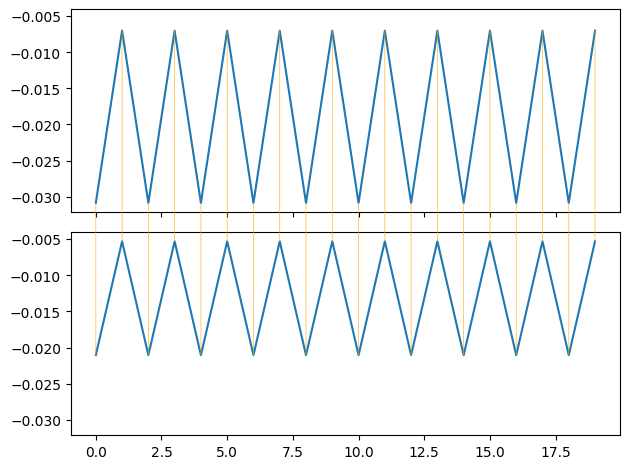

In [49]:
part= "manoI"
angles1 = get_position(my_dataframes1, part)
angles2 = get_position(my_dataframes2, part)

angles1 = np.array(angles1).transpose()
angles2 = np.array(angles2).transpose()

#positions1 = positions1[[0, 10, 100, 300, 301, 400],:]
#positions2 = positions2[[0, 1, 10, 30, 401, 405],:]
angles1 = angles1[:1000:100,:]
angles2 = angles2[:2000:200,:]

print("Sin normalizar")
print("1 =", angles1)
print("2= ", angles2)

#angles1 = angles1/np.linalg.norm(angles1)
#angles2 = angles2/np.linalg.norm(angles2)

print("Normalizados")
print("1 =",angles1)
print("2 =",angles2)

angles1 = angles1.reshape(2*len(angles1),)
#angles1 = angles1/np.linalg.norm(angles1)

angles2 = angles2.reshape(2*len(angles2),)
#angles2 = angles2/np.linalg.norm(angles2)

print("En una dimension")
print("1 = ", angles1)
print("2 = ", angles2)

path = dtw.warping_path(angles1, angles2)
#np.set_printoptions(precision=3)
print(path)
dtwvis.plot_warping(angles1, angles2, path)
dtw.distance(angles1, angles2)

In [50]:
def normalize(positions):
    #print(np.linalg.norm(positions))
    #normalized = positions/np.linalg.norm(positions)
    return positions

def dtwdis(positions1, positions2,i,j):
    positions1 = positions1.reshape(2*i,)
    positions1 = normalize(positions1)
    
    positions2 = positions2.reshape(2*j,)
    positions2 = normalize(positions2)
    
    return dtw.distance_fast(positions1, positions2)

def distance_dtw_with_distances(points1, points2):
    distances = []
    for part in body:
        positions1 = np.array(get_position(points1, part), dtype=float).transpose()
        positions2 = np.array(get_position(points2, part), dtype=float).transpose()
        positions1 = normalize(positions1)
        positions2 = normalize(positions2)
        distances.append(dtwdis(positions1, positions2, len(positions1), len(positions2)))
    return distances

def distance_dtw(points1, points2):
    distances = distance_dtw_with_distances(points1,points2)
    score = 1 - np.mean(distances)
    return score




In [51]:
print(distance_dtw(my_dataframes1, my_dataframes2))

0.432267443785755


#### Con ángulos

In [52]:
angles_names = [
    'angCuelloI',
    'angCuelloD', 
    'angCodoI', 
    'angCodoD', 
    'angHombroI', 
    'angHombroD',
    'angCaderaI', 
    'angCaderaD', 
    'angCaderaTorsoI', 
    'angCaderaTorsoD',
    'angRodillaI', 
    'angRodillaD'
    ]

In [53]:
def get_angle(df, angle_name):
    angle = df.loc[:, angle_name] 
    return angle

def get_angles_from_df(df):
    angles = []
    for i in angles_names:
        angles.append(df.loc[:,i])
    angles = np.array(angles)
    return angles


En este caso se van a usar los angulos del codo izquierdo.  

In [54]:
part= "angCodoI"
angles1 = get_angle(my_dataframes1, part)
angles2 = get_angle(my_dataframes2, part)

print(angles1)
print(angles2)

0      0.992212
1      0.992265
2      0.990513
3      0.990210
4      0.990513
         ...   
994    0.827010
995    0.544333
996    0.562412
997    0.276111
998    0.278993
Name: angCodoI, Length: 999, dtype: float64
0       0.594229
1       0.594029
2       0.583257
3       0.577780
4       0.575569
          ...   
2115    0.371140
2116    0.360714
2117    0.363948
2118    0.343335
2119    0.287811
Name: angCodoI, Length: 2120, dtype: float64


Se normalizan los angulos

In [55]:
angles1 = np.array(angles1).transpose()
angles2 = np.array(angles2).transpose()

#positions1 = positions1[[0, 10, 100, 300, 301, 400]]
#positions2 = positions2[[0, 1, 10, 30, 401, 405]]
angles1 = angles1[:1000:10]
angles2 = angles2[:2000:20]

#print("Sin normalizar")
#print("1 =", angles1)
#print("2= ", angles2)

angles1 = angles1/np.linalg.norm(angles1)
angles2 = angles2/np.linalg.norm(angles2)

#print("Normalizados")
#print("1 =",angles1)
#print("2 =",angles2)

Se calculan las distancias

[(0, 0), (1, 1), (2, 1), (3, 1), (4, 1), (5, 2), (6, 3), (7, 3), (8, 3), (9, 3), (10, 3), (11, 3), (12, 4), (13, 5), (14, 5), (15, 6), (16, 7), (17, 7), (18, 8), (19, 9), (20, 10), (21, 10), (22, 11), (22, 12), (22, 13), (22, 14), (23, 15), (24, 16), (24, 17), (24, 18), (24, 19), (24, 20), (24, 21), (24, 22), (24, 23), (25, 24), (26, 25), (27, 26), (28, 27), (29, 28), (30, 29), (31, 29), (32, 29), (33, 29), (34, 29), (35, 29), (36, 30), (37, 31), (37, 32), (37, 33), (37, 34), (37, 35), (37, 36), (37, 37), (37, 38), (37, 39), (38, 40), (39, 40), (40, 40), (41, 40), (42, 40), (43, 40), (44, 40), (45, 40), (46, 40), (47, 40), (48, 40), (49, 40), (50, 40), (51, 40), (52, 40), (53, 40), (54, 40), (55, 40), (56, 40), (57, 40), (58, 40), (59, 40), (60, 40), (61, 40), (62, 41), (63, 42), (64, 43), (65, 44), (66, 45), (67, 46), (68, 47), (69, 48), (70, 49), (71, 49), (72, 49), (73, 49), (74, 50), (74, 51), (75, 52), (76, 53), (77, 53), (78, 53), (79, 54), (79, 55), (79, 56), (79, 57), (79, 58),

0.2694764378870548

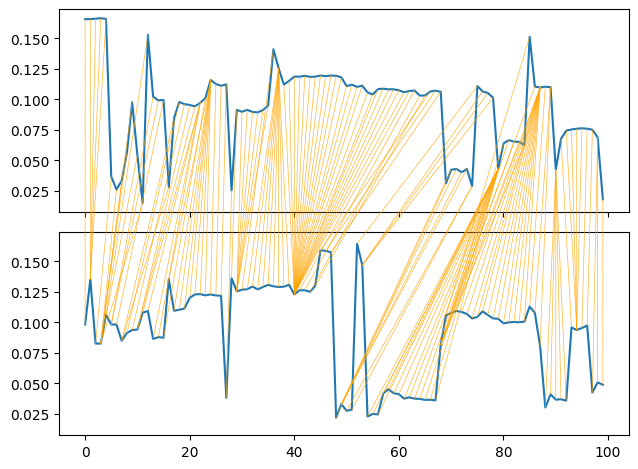

In [56]:
path = dtw.warping_path(angles1, angles2)
#np.set_printoptions(precision=3)
print(path)
dtwvis.plot_warping(angles1, angles2, path)
dtw.distance(angles1, angles2)

In [57]:
def normalize_angles(angles):
    #normalized = angles/360
    #normalized = angles/np.linalg.norm(angles)
    #print("max = ", np.max(normalized))
    #print(angles)
    return angles

def dtwdis_angles(angles1, angles2):
    from tslearn.metrics import soft_dtw
    return soft_dtw(angles1, angles2, 0)
    #print(a)
    return a

def distance_dtw_angles_with_distances(points1, points2, custom_names = None):
    distances = []
    actual_angles = angles_names if custom_names == None else custom_names  
    for angle_name in actual_angles:
        angles1 = np.array(get_angle(points1, angle_name)).transpose()
        #print(angles1)
        #print(np.linalg.norm(angles1))
        angles2 = np.array(get_angle(points2, angle_name)).transpose()
        angles1 = normalize_angles(angles1)
        #print(angles1)
        angles2 = normalize_angles(angles2)

        actual_distance = dtwdis_angles(angles1, angles2)
        #print(angle_name, " ", actual_distance)
        
        distances.append(actual_distance)
    #print(distance)
    return distances

def distance_dtw_angles(points1, points2, custon_names = None):
    distances = distance_dtw_angles_with_distances(points1, points2, custon_names)
    distance = np.mean(distances)
    score = distance
    return score

In [58]:
print(distance_dtw_angles(my_dataframes1, my_dataframes2))

29.210646175791098


## Comparacion de ejercicios

### Caso  ejercicios de ejercicios de pacientes

#### Caso  ejercicios de mismo tipo de ejercicio

Como primer caso se va a usar el ejercicio cruz_ej1

In [59]:
dataframes1 = get_filenames_patients("cruz_ej1")

csv1 = dataframes1[0]
csv2 = dataframes1[1]

cruz_ej1_1 = open_dataframe(csv1)
cruz_ej1_2 = open_dataframe(csv2)

La puntuacion usando los puntos es la siguiente.

In [60]:
print("Distancias")
distance_points = distance_dtw_angles_with_distances(cruz_ej1_1, cruz_ej1_2)
print("Puntuacion")
distance_points = distance_dtw(cruz_ej1_1, cruz_ej1_2)
print(distance_points)

Distancias
Puntuacion
0.6942179930465493


Y usando los angulos

In [61]:
distance_angles = distance_dtw_angles(cruz_ej1_1, cruz_ej1_2)
print(distance_angles)
print(distance_dtw_angles_with_distances(cruz_ej1_1, cruz_ej1_2))

7.826707134242551
[9.559035667850413, 9.559039377320312, 5.236833931686905, 5.641451350337964, 6.885782447283825, 15.718050176109932, 6.223024958318787, 8.692968005239873, 5.982802544005876, 5.9828465284215655, 5.58721530682959, 8.851435317505569]


#### Caso ejercicios de distintos tipos

En este caso se usan los anteriores y cruz_ej3 y pelota2

In [62]:
dataframes2 = get_filenames_patients("cruz_ej3")
dataframes3 = get_filenames_patients("pelota2")

dataframe3 = dataframes2[0]
dataframe4 = dataframes3[0]

cruz_ej3 = open_dataframe(dataframe3)
pelota2 = open_dataframe(dataframe4)

En el primer caso se va a comparar un ejercicio de cruz_ej1 con uno de cruz_ej3.
Por un lado se obtiene la puntuación de usando los puntos.

In [63]:
print(distance_dtw_with_distances(cruz_ej1_2, cruz_ej3))
print(distance_dtw(cruz_ej1_2, cruz_ej3))

[0.5337473450094304, 0.5338620996158926, 0.5337882387338662, 0.5339232752533289, 0.5340058021588753, 0.5342496660466945, 0.5342154661911939, 0.5344460251207301, 0.5343218434877695, 0.5343992794717992, 0.534371279669245, 0.5346861634312838, 0.5347004327370003, 0.5350127235179335, 0.5350758385399962]
0.4656796347343306


Despues se calcula la distancia y puntuación de los angulos

In [64]:
print(distance_dtw_angles_with_distances(cruz_ej1_2, cruz_ej3))
print(distance_dtw_angles(cruz_ej1_2, cruz_ej3))

[22.071514590227245, 22.071521239477672, 12.062276489654298, 8.740569361936634, 6.226571543479894, 4.795435913210382, 12.46577456775608, 18.66525734652446, 6.932025020860289, 6.93202698204706, 12.249779426661757, 14.458274386937765]
12.305918905731128


In [65]:
print("Puntos")
print(distance_dtw(cruz_ej1_1, pelota2))
print(distance_dtw(cruz_ej1_2, pelota2))

Puntos
0.6448145178515124
0.8307169114178801


In [66]:
print(distance_dtw_angles_with_distances(cruz_ej1_1, pelota2))
print(distance_dtw_angles(cruz_ej1_1, pelota2))

[20.372814744774512, 20.372837822047188, 11.748331669111357, 16.59855268342642, 12.474073319964475, 33.07777981112379, 17.600686337844362, 8.655315996475556, 9.213597644491928, 9.213939223402784, 11.608812463205112, 16.88733984092143]
15.652006796399077


In [67]:
print(distance_dtw_angles_with_distances(cruz_ej1_2, pelota2))
print(distance_dtw_angles(cruz_ej1_2, pelota2))

[8.405150619155233, 8.405166175821545, 15.138663184285583, 18.082297912607743, 9.829000929564467, 24.698490043851383, 17.99689573406233, 18.84690653680989, 6.2876555071653675, 6.287772806476476, 10.23576799439781, 17.11615104182463]
13.444159873835204


### Comparación de videos de profesionales

In [68]:
dataframes_profesional_cruz_ej3 = get_filenames_profesionals("cruz_ej3")
dataframe_profesional_cruz_ej3_1 = dataframes_profesional_cruz_ej3[0]
dataframe_profesional_cruz_ej3_2 = dataframes_profesional_cruz_ej3[1]

dataframes_profesional_pelota2 = get_filenames_profesionals("pelota1")
dataframe_profesional_pelota2_1 = dataframes_profesional_pelota2[2]
dataframe_profesional_pelota2_2 = dataframes_profesional_pelota2[1]

dataframe_profesional_cruz_ej3_1 = open_numpy(dataframe_profesional_cruz_ej3_1)
dataframe_profesional_cruz_ej3_2 = open_numpy(dataframe_profesional_cruz_ej3_2)
dataframe_profesional_pelota2_1 = open_numpy(dataframe_profesional_pelota2_1)
dataframe_profesional_pelota2_2 = open_numpy(dataframe_profesional_pelota2_2)

#### Caso  ejercicios de mismo tipo de ejercicio

In [69]:
print(distance_dtw_angles(dataframe_profesional_cruz_ej3_1, dataframe_profesional_cruz_ej3_2))
print(distance_dtw_angles(dataframe_profesional_pelota2_1, dataframe_profesional_pelota2_2))

3.7945058939566247
6.064876220152716


In [70]:
print(distance_dtw_angles_with_distances(dataframe_profesional_cruz_ej3_1, dataframe_profesional_cruz_ej3_2))
print(distance_dtw_angles_with_distances(dataframe_profesional_pelota2_1, dataframe_profesional_pelota2_2))

[2.3537927068340654, 2.3537919477703904, 10.446050156964708, 3.7739381664076506, 2.0192451021648803, 15.613407318237366, 0.5442188408671281, 1.1581670971516391, 1.4499275365777684, 1.4499320714106336, 1.7581783424376847, 2.6134214406555816]
[1.223156914128552, 1.2231555207014382, 2.916001232274958, 1.4842175221906306, 1.0928208512726914, 4.156992752081985, 8.231228209678605, 4.580036564011016, 12.510082199260362, 12.50988872786007, 17.20050980133545, 5.650424347036845]


#### Caso  ejercicios de distintos tipos de ejercicio

In [71]:
print(distance_dtw_angles(dataframe_profesional_cruz_ej3_1, dataframe_profesional_pelota2_1))
print(distance_dtw_angles(dataframe_profesional_cruz_ej3_2, dataframe_profesional_pelota2_1))
print(distance_dtw_angles(dataframe_profesional_cruz_ej3_1, dataframe_profesional_pelota2_2))
print(distance_dtw_angles(dataframe_profesional_cruz_ej3_2, dataframe_profesional_pelota2_2))

4.648960375500341
16.702967663039555
3.6553219907855525
12.838474177919222


In [72]:
print(distance_dtw_angles_with_distances(dataframe_profesional_cruz_ej3_1, dataframe_profesional_pelota2_1))
print(distance_dtw_angles_with_distances(dataframe_profesional_cruz_ej3_2, dataframe_profesional_pelota2_1))
print(distance_dtw_angles_with_distances(dataframe_profesional_cruz_ej3_1, dataframe_profesional_pelota2_2))
print(distance_dtw_angles_with_distances(dataframe_profesional_cruz_ej3_2, dataframe_profesional_pelota2_2))

[2.82300255731958, 2.822993484552819, 6.978174747944029, 6.5332600282502815, 4.743450955069616, 4.554851073589309, 3.6574357531990778, 3.433956491228726, 6.286315865901956, 6.286229171363486, 4.94944668575863, 2.7184076918265863]
[3.13701674149348, 3.137011665910448, 48.93438579781828, 38.677811503721266, 3.875141400670824, 76.55715818922096, 3.4939754770391525, 4.106939129936908, 3.7381811996129866, 3.738191066843627, 5.293420985123766, 5.746378799082936]
[2.7264627486811106, 2.7264642131242645, 4.031813281564454, 4.531592925102406, 4.582774647723092, 3.562422075854259, 3.3036983459485247, 3.348348676524058, 2.9724147448125833, 2.972431035206314, 4.3354765019305015, 4.7699646929550665]
[4.697854778456262, 4.6978489407241355, 34.023974663954256, 28.00314676537074, 3.9493833999275236, 54.77641004745442, 2.876099809185017, 3.2851722426506322, 2.237454753000788, 2.237425043042913, 5.734977991695113, 7.541941699568905]


Comparación de ejercicios de pacientes con los correctos

In [73]:
dataframes_patient_cruz_ej3 = get_filenames_patients("cruz_ej3")
dataframe_patient_cruz_ej3_1 = dataframes_patient_cruz_ej3[0]
dataframe_patient_cruz_ej3_2 = dataframes_patient_cruz_ej3[1]

dataframes_profesional_cruz_ej3 = get_filenames_profesionals("cruz_ej3")
dataframe_profesional_cruz_ej3_1 = dataframes_profesional_cruz_ej3[0]
dataframe_profesional_cruz_ej3_2 = dataframes_profesional_cruz_ej3[1]

dataframe_patient_cruz_ej3_1 = open_dataframe(dataframe_patient_cruz_ej3_1)
dataframe_patient_cruz_ej3_2 = open_dataframe(dataframe_patient_cruz_ej3_2)
dataframe_profesional_cruz_ej3_1 = open_numpy(dataframe_profesional_cruz_ej3_1)
dataframe_profesional_cruz_ej3_2 = open_numpy(dataframe_profesional_cruz_ej3_2)

In [74]:
print(distance_dtw_angles(dataframe_patient_cruz_ej3_1, dataframe_profesional_cruz_ej3_1))
print(distance_dtw_angles(dataframe_patient_cruz_ej3_2, dataframe_profesional_cruz_ej3_1))
print(distance_dtw_angles(dataframe_patient_cruz_ej3_1, dataframe_profesional_cruz_ej3_2))
print(distance_dtw_angles(dataframe_patient_cruz_ej3_2, dataframe_profesional_cruz_ej3_2))

3.4650083453449363
4.911753042774446
15.067563815426135
17.298332578387573


In [75]:
print(distance_dtw_angles_with_distances(dataframe_patient_cruz_ej3_1, dataframe_profesional_cruz_ej3_1))
print(distance_dtw_angles_with_distances(dataframe_patient_cruz_ej3_2, dataframe_profesional_cruz_ej3_1))
print(distance_dtw_angles_with_distances(dataframe_patient_cruz_ej3_1, dataframe_profesional_cruz_ej3_2))
print(distance_dtw_angles_with_distances(dataframe_patient_cruz_ej3_2, dataframe_profesional_cruz_ej3_2))

[2.6238659582718706, 2.623866678306308, 6.588019923872069, 3.3351255542217175, 4.502401836319173, 4.298558966962584, 1.7363278091857257, 2.2450718327616928, 3.934129361972832, 3.9341302260711006, 2.1618859610686076, 3.5967160351255587]
[2.849615839345856, 2.849633893514655, 15.482158222273291, 4.403044607474721, 6.163058134037608, 4.531424328274733, 5.379053268024695, 3.376853628606967, 3.875949254143576, 3.875985779517337, 1.7634705356845046, 4.390789022395408]
[11.010971148403275, 11.010974660038396, 50.08873326945464, 34.03806618386422, 4.2724434617387175, 46.49823641242918, 2.3598247226358815, 3.709717280558473, 3.9584556405080185, 3.958424584231378, 2.8044268858665484, 7.100491535384903]
[11.8381525685785, 11.838145860673892, 70.26487833330044, 30.667951196272437, 4.789417605217592, 52.157765901072366, 4.888814579900936, 5.536912685145577, 3.1833585994877316, 3.1833395679291208, 2.139141236181047, 7.0921128068912385]


In [76]:
dataframes_patient_pelota2 = get_filenames_patients("pelota1")
dataframe_patient_pelota2_1 = dataframes_patient_pelota2[2]
dataframe_patient_pelota2_2 = dataframes_patient_pelota2[1]

dataframes_profesional_pelota2 = get_filenames_profesionals("pelota1")
dataframe_profesional_pelota2_1 = dataframes_profesional_pelota2[2]
dataframe_profesional_pelota2_2 = dataframes_profesional_pelota2[1]

dataframe_patient_pelota2_1 = open_dataframe(dataframe_patient_pelota2_1)
dataframe_patient_pelota2_2 = open_dataframe(dataframe_patient_pelota2_2)
dataframe_profesional_pelota2_1 = open_numpy(dataframe_profesional_pelota2_1)
dataframe_profesional_pelota2_2 = open_numpy(dataframe_profesional_pelota2_2)

In [77]:
print(distance_dtw_angles(dataframe_patient_pelota2_1, dataframe_profesional_pelota2_1))
print(distance_dtw_angles(dataframe_patient_pelota2_2, dataframe_profesional_pelota2_1))
print(distance_dtw_angles(dataframe_patient_pelota2_1, dataframe_profesional_pelota2_2))
print(distance_dtw_angles(dataframe_patient_pelota2_2, dataframe_profesional_pelota2_2))

18.919563082709413
15.394100089454435
29.48229641500039
16.715273047752117


In [78]:
print(distance_dtw_angles_with_distances(dataframe_patient_pelota2_1, dataframe_profesional_pelota2_1))
print(distance_dtw_angles_with_distances(dataframe_patient_pelota2_2, dataframe_profesional_pelota2_1))
print(distance_dtw_angles_with_distances(dataframe_patient_pelota2_1, dataframe_profesional_pelota2_2))
print(distance_dtw_angles_with_distances(dataframe_patient_pelota2_2, dataframe_profesional_pelota2_2))

[11.509113227801581, 11.509100752165144, 10.906989456556914, 9.952517881120192, 12.442643845623254, 14.985770265059552, 14.364022458337425, 5.29988707863025, 7.266509659367971, 7.266737582161174, 8.707192297808486, 112.82427248788103]
[13.341797553743346, 13.341814754145535, 16.681997217800156, 16.52870056857708, 13.39251617509968, 35.0642079209446, 12.244575123985891, 18.562747571050433, 4.253957013487717, 4.25395177833278, 10.4538572881466, 26.609078108139403]
[10.514005691367764, 10.513997779766562, 10.185882159173769, 8.97738503505439, 2.4473593039431463, 8.963641370432612, 13.646802939000674, 6.186828788319446, 122.4580886459122, 122.45786514680411, 13.856750664949823, 23.57894945528021]
[11.880610568247128, 11.880607970852367, 17.74038007864048, 15.900147883657946, 4.6656694439460145, 21.140879859914158, 22.95111359932221, 9.985827430712227, 32.878651955226864, 32.87882262778262, 9.190617175440849, 9.489947979282514]


Entre distintos ejercicios

In [79]:
print(distance_dtw_angles(dataframe_patient_cruz_ej3_1, dataframe_profesional_pelota2_1))
print(distance_dtw_angles(dataframe_patient_cruz_ej3_1, dataframe_profesional_pelota2_2))
print(distance_dtw_angles(dataframe_patient_pelota2_1, dataframe_profesional_cruz_ej3_1))
print(distance_dtw_angles(dataframe_patient_pelota2_2, dataframe_profesional_cruz_ej3_2))

9.046413872980416
6.070557069910176
12.57156164326292
94.47847629483869


In [80]:
print(distance_dtw_angles_with_distances(dataframe_patient_cruz_ej3_1, dataframe_profesional_pelota2_1))
print(distance_dtw_angles_with_distances(dataframe_patient_cruz_ej3_1, dataframe_profesional_pelota2_2))
print(distance_dtw_angles_with_distances(dataframe_patient_pelota2_1, dataframe_profesional_cruz_ej3_1))
print(distance_dtw_angles_with_distances(dataframe_patient_pelota2_2, dataframe_profesional_cruz_ej3_2))

[8.175842742766081, 8.175837285001853, 10.792849698508059, 8.214357929371046, 13.48347212809174, 10.613867706724937, 7.896828314987831, 5.527687048037579, 9.39986492070561, 9.399639081033639, 6.44958323890981, 10.427136381626815]
[5.4796710785885345, 5.479666391606492, 6.782444760105982, 6.89746945765864, 11.23880535253709, 9.7493933108117, 3.085041696547009, 3.6248665969330647, 4.713031613969447, 4.713003355715214, 5.1972553782978705, 5.88603584615108]
[10.107530315178813, 10.10750794964482, 11.550137753525451, 24.932419406141243, 10.307388929732205, 5.3151554396972704, 8.521142118301125, 8.567202983846226, 20.922517557185046, 20.92306786223525, 4.665549860842593, 14.939119542824983]
[34.862113835173254, 34.86208399993434, 254.11219608728223, 343.6925044783382, 9.695072456289559, 371.8134440423586, 14.234944207592902, 14.538990413765127, 10.723579040372055, 10.723669545826962, 14.671281484200627, 19.81183594693064]
